In [2]:
import os
import vertexai
import pandas as pd
from google.oauth2 import service_account
from langchain_google_vertexai import VertexAI
from IPython.display import display, Image as IPImage
from GCP.lib.prompts.text_block_evaluate import create_chain_evaluation

filename = 'C:\\Agentes-RAG\\GCP-Credentials\\llms-433815-5e7ca2a0c045.json'
credentials: service_account.Credentials = (
    service_account.Credentials.from_service_account_file(filename)
)

#Login
vertexai.init(project=credentials.project_id, location='us-central1', credentials=credentials)

In [3]:
base_unstruced_img = '../../unstructured/project/NoteBooks/images'
base_unstruced_data = '../../unstructured/project/NoteBooks/data'
document_name = 'Retrieval-Augmented Generation for Knowledge-Intensive NLP Tasks.pdf'
df_unstructured = pd.read_csv(os.path.join(base_unstruced_data, 'raw', document_name + '.csv'), index_col=0)

try:
    with open(os.path.join(base_unstruced_data, 'meta', document_name + '.json'), 'r') as archivo:
        document_meta_info = archivo.read()
except:
    document_meta_info = ""


In [4]:
# To use model
gemini_model = VertexAI(model_name="gemini-1.5-pro-001")
llama_model = VertexAI(model_name="publishers/meta/models/llama3-405b-instruct-maas")

gemini_eval_chain = create_chain_evaluation(gemini_model, document_meta_info)
llama_eval_chain = create_chain_evaluation(llama_model, document_meta_info)


In [43]:
example_row = {
    "text_to_evaluate": 'An example of a small application that you can create using LangChain on Vertex AI is one that returns the exchange rate between two currencies on a specified date.',
    "old_type": 'NarrativeText',
    'next_block': 'None'}

print('# GEMINI 1.5 Pro\n', gemini_eval_chain.invoke(example_row))
print('\n# LLaMa 3.1 405b\n', llama_eval_chain.invoke(example_row))


# GEMINI 1.5 Pro
 {'makes_sense': True, 'block_type': 'NarrativeText', 'description': 'This text block provides a specific example of a small application that can be built using LangChain on Vertex AI, focusing on currency exchange rate retrieval.'}

# LLaMa 3.1 405b
 {'makes_sense': True, 'block_type': 'NarrativeText', 'description': 'The text block describes an example application of LangChain on Vertex AI, specifically one that returns the exchange rate between two currencies on a specified date.'}


In [2]:
from GCP.lib.model.GCP_Model import GCP_Model

gcp_model = GCP_Model(
    model_name="gemini-1.5-pro-001", 
    credentials_path='C:\\Agentes-RAG\\GCP-Credentials\\llms-433815-5e7ca2a0c045.json'
)

In [7]:
gcp_model.invoke('Funciona!!!')

'¡Me alegro mucho de oír eso! 😄 \n\n¿Hay algo más en lo que pueda ayudarte hoy? 🤔 \n'

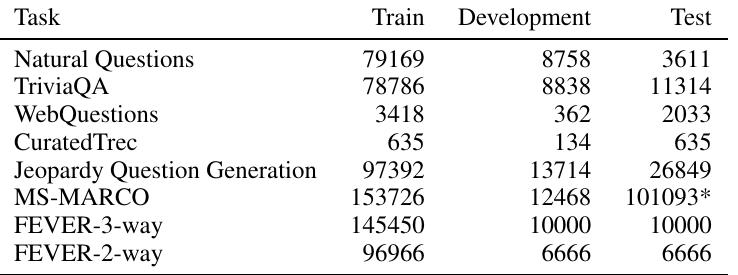

"I can't process image data directly. The `data` field you provided is a byte string containing the JPEG image's binary data. To analyze this image, you would need to:\n\n1. **Decode the byte string:** Convert the string representation of the byte data back into actual bytes.  You can typically do this with a function like `bytes.fromhex(your_data_string)` in Python.\n2. **Use an image processing library:** Libraries like Pillow (PIL) in Python, or similar libraries in other programming languages, can handle image data. These libraries can open, decode, and analyze the JPEG image from its binary data.\n\n**Example using Pillow (PIL) in Python:**\n\n```python\nfrom PIL import Image\nfrom io import BytesIO\n\n# Assuming inline_data is a dictionary as provided\nimage_data = inline_data['data']\n\n# Decode the byte string\nimage_bytes = bytes.fromhex(image_data)\n\n# Open the image using Pillow\nimage = Image.open(BytesIO(image_bytes))\n\n# Now you can perform image analysis tasks\nprint(i

In [32]:
img_path = os.path.join(base_unstruced_img, document_name, 'table-19-5.jpg')
display(IPImage(img_path))


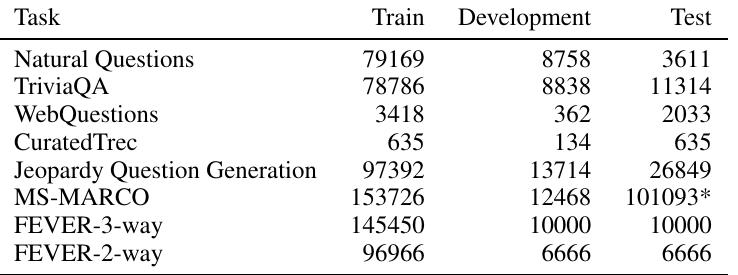

''

In [17]:
from IPython.display import display, Image


''

In [ ]:
from IPython.display import display, Image

In [8]:
gemini_model.invoke('Hola')

'¡Hola! 👋  ¿Cómo puedo ayudarte hoy? 🙂 \n'

In [ ]:
IPython.display.

In [14]:
def reclasificar(serie):


    if serie['type'] == 'Title' or serie['type'] == 'Image':
        None
    else:
        None
    return None

In [16]:
    # result = df_unstructured.apply(reclasificar, axis=1)

df_unstructured['type'].value_counts()

type
NarrativeText        74
ListItem             68
Title                43
Footer               12
UncategorizedText     7
Image                 5
Table                 5
FigureCaption         4
Header                3
Formula               3
Name: count, dtype: int64